In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-data-and-ratio-sector-industry-2021/Financial Data and Ratio Q4 Sektor Industri - 2021.csv
/kaggle/input/daftar-emiten-sektor-industri-mar-2022/Daftar_Emiten_Sektor_Industri_Mar_2022.csv


***
# CLUSTERING EMITEN SEKTOR INDUSTRI Q4 2021 -  HAJAR HANIFAH 
***

Tujuan penelitian ini adalah melakukan clustering terhadap data seluruh emiten saham di sektor industri Q4 2021. 
Adapun beberapa step yang akan dilakukan adalah 
1. load data
2. Data cleansing
3. Display scatter plot
4. Clustering Data
5. Menentukan Outliers
6. Mencari K-Means
7. Mengukur Elbow Point 
8. Menampilkan Result data clustering

***
# 1. Import Libraries
***

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

***
# 2. Exploratory Data Analysis
***


# 2.1 Data Understanding

Data yang diambil merupakan data statictical financial ratio Q4 2021 untuk seluruh emiten di sektor Industri.

Data di dapatkan dari [IDX - Laporan Statistic Financial Data Ratio](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)


# 2.2 Understanding The Table

* **Emiten :** Pihak yang melakukan penawaran umum, yaitu penawaran efek yang dilakukan oleh emiten untuk menjual efek kepada masyarakat berdasarkan tata cara yang diatur dalam peraturan undang-undang yang berlaku. 
* **Sales Growth :** Kenaikan jumlah penjualan dari tahun ke tahun atau dari waktu ke waktu.
* **ROA (Return of Asset) :** Indikator untuk menunjukkan seberapa untuk sebuah perusahaan dibandingkan dengan total asetnya. 
* **DER (Debt to Equity) :** Rasio hutang terhadap ekuitas atau rasio keuangan yang membandingkan jumlah hutang dengan ekuitas

Keterangan rasio yang akan digunakan : 
- **DER =** Total Uang / Total Ekuitas
- **Return on Asset =** Laba setelah pajak / Total Asset 
- **Sales Growth =** (penjualan periode 2021 - penjualan periode 2020)/ penjualan periode 2020

# 2.3 Load Data

In [3]:
data = pd.read_csv('../input/financial-data-and-ratio-sector-industry-2021/Financial Data and Ratio Q4 Sektor Industri - 2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emiten        49 non-null     object 
 1   sales 2021    49 non-null     object 
 2   sales 2020    49 non-null     object 
 3   sales growth  49 non-null     float64
 4   DER           49 non-null     float64
 5   ROA           49 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.4+ KB


In [4]:
data.describe()

,sales growth,DER
count,49.000000,49.000000
mean,0.216122,1.636939
std,0.376136,3.014889
min,-0.280000,-2.860000
25%,-0.030000,0.490000
50%,0.160000,0.720000
75%,0.360000,1.680000
max,1.440000,16.330000


In [5]:
display(data)

,emiten,sales 2021,sales 2020,sales growth,DER,ROA
0,AMFG,"3,482.42","2,628.14",0.33,1.32,0.06
1,AMIN,126.41,89.53,0.41,1.14,-0.05
2,APII,196.58,191.18,0.03,0.49,0.05
3,ARKA,49.52,40.49,0.22,3.97,-0.02
4,ARNA,"1,885.43","1,612.59",0.17,0.51,0.21
5,CAKK,192.80,148.83,0.30,0.88,0.03
6,CCSI,309.02,172.84,0.79,0.31,0.11
7,CTTH,63.36,76.58,-0.17,2.28,-0.05
8,HEXA,"2,558.36","1,521.05",0.68,1.38,0.12
9,IKBI,"1,607.30",959.71,0.67,0.67,0.01


# 2.4 Data Cleansing

In [6]:
data.drop(["sales 2021","sales 2020"], axis=1, inplace=True)

# 2. Scatter Plot

<Figure size 1440x1440 with 0 Axes>

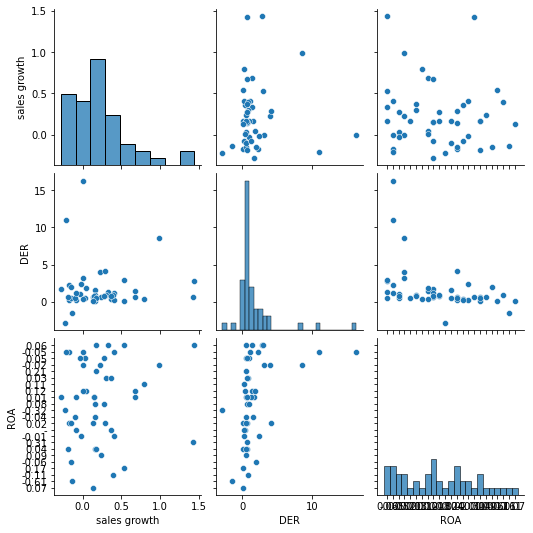

In [7]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, vars = data.columns[1:6]);


# 3. CLUSTERING


# 3.1 Load Data

**Add new Column on Dataset**

In [8]:
data["category"] = pd.NaT

**Delete Row with value "-"**

In [9]:
data.drop(data.index[data['ROA'] == '-'], inplace=True)

In [10]:
data.describe()

,sales growth,DER
count,47.000000,47.000000
mean,0.219362,1.694468
std,0.381133,3.066189
min,-0.280000,-2.860000
25%,-0.025000,0.500000
50%,0.160000,0.730000
75%,0.350000,1.750000
max,1.440000,16.330000


In [11]:
display(data)

,emiten,sales growth,DER,ROA,category
0,AMFG,0.33,1.32,0.06,NaT
1,AMIN,0.41,1.14,-0.05,NaT
2,APII,0.03,0.49,0.05,NaT
3,ARKA,0.22,3.97,-0.02,NaT
4,ARNA,0.17,0.51,0.21,NaT
5,CAKK,0.30,0.88,0.03,NaT
6,CCSI,0.79,0.31,0.11,NaT
7,CTTH,-0.17,2.28,-0.05,NaT
8,HEXA,0.68,1.38,0.12,NaT
9,IKBI,0.67,0.67,0.01,NaT


# 3.2 Scatter Plot

<AxesSubplot:xlabel='emiten', ylabel='sales growth'>

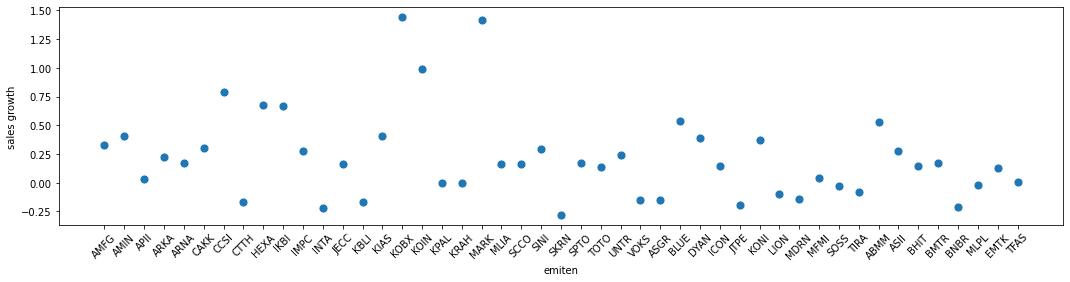

In [12]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='sales growth', 
                data=data, s=80)

<AxesSubplot:xlabel='emiten', ylabel='DER'>

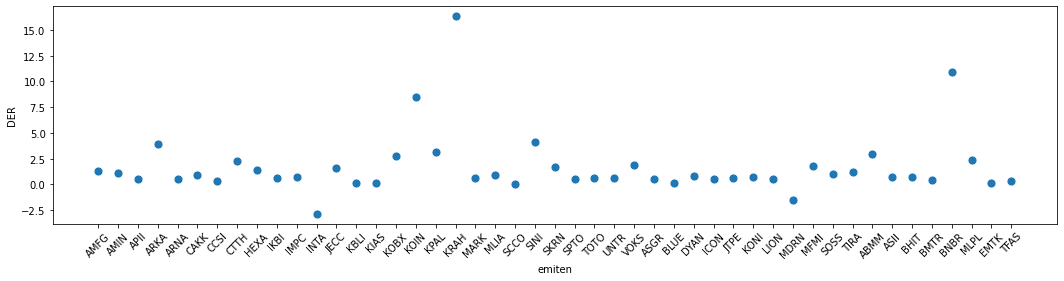

In [13]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='DER', 
                data=data, s=80)

<AxesSubplot:xlabel='emiten', ylabel='ROA'>

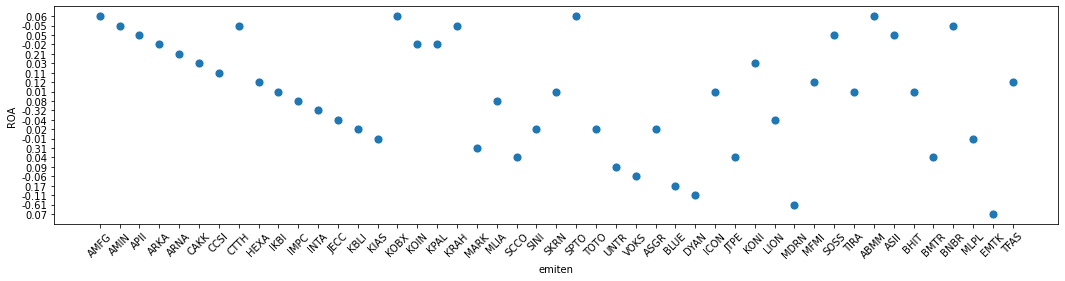

In [14]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='ROA', 
                data=data, s=80)

# 3.3 Outlier

In [15]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([False] * len(data))
for col in ['sales growth']:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 47
Jumlah baris setelah memfilter outlier: 45


In [16]:
data.describe()

,sales growth,DER
count,45.000000,45.000000
mean,0.165556,1.692889
std,0.286845,3.126935
min,-0.280000,-2.860000
25%,-0.030000,0.490000
50%,0.160000,0.730000
75%,0.300000,1.680000
max,0.990000,16.330000


# 3.4 Standarisasi Fitur

In [17]:

feats = ['sales growth', 'DER','ROA']
X = data[feats].values
y = data['category'].values

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit_transform(X)
new_dataframe = pd.DataFrame(data = standardscaler, columns = feats)
new_dataframe.describe()

,sales growth,DER,ROA
count,4.500000e+01,4.500000e+01,4.500000e+01
mean,-5.427757e-17,-1.282924e-16,4.687608e-17
std,1.011300e+00,1.011300e+00,1.011300e+00
min,-1.570852e+00,-1.472476e+00,-5.013854e+00
25%,-6.894511e-01,-3.890332e-01,-2.254431e-01
50%,-1.958668e-02,-3.114134e-01,9.919495e-02
75%,4.739976e-01,-4.168469e-03,4.238330e-01
max,2.906663e+00,4.733872e+00,1.641226e+00


In [18]:
new_dataframe

,sales growth,DER,ROA
0,0.579766,-0.120598,0.423833
1,0.861814,-0.178813,-0.468922
2,-0.477915,-0.389033,0.342673
3,0.191949,0.736453,-0.225443
4,0.015669,-0.382565,1.641226
5,0.473998,-0.262901,0.180354
6,2.201543,-0.447248,0.829630
7,-1.183035,0.189881,-0.468922
8,1.813726,-0.101193,0.910790
9,1.778470,-0.330818,0.018035


# 3.5 K-Means

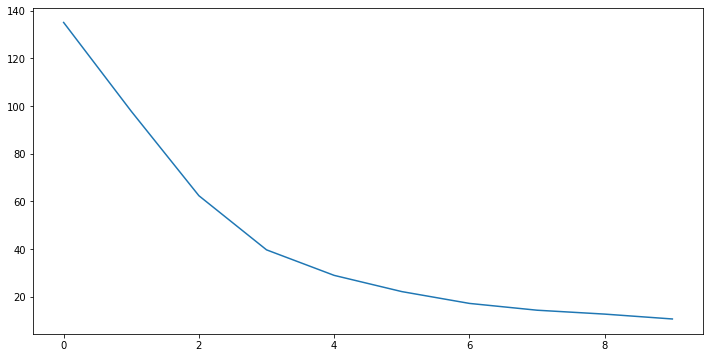

In [19]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_dataframe.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 6 cluster (n_cluster = 6)

# 2.6 Pilih Jumlah Cluster

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_dataframe.values)

KMeans(n_clusters=5, random_state=0)

In [21]:
new_dataframe['target'] = y
new_dataframe['fit'] = kmeans.labels_

# 2.7 Plot Cluster

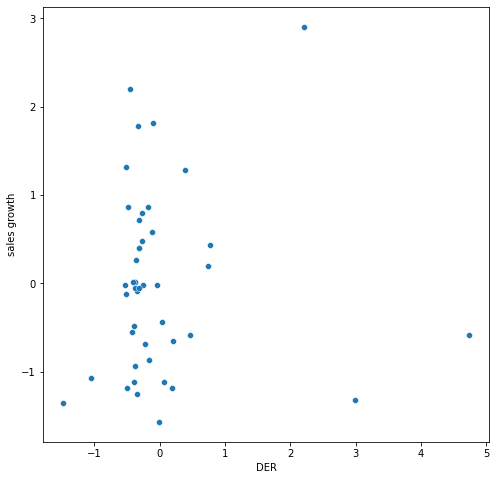

In [22]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='sales growth', hue=new_dataframe.target.to_list(), data=new_dataframe);

In [23]:
new_dataframe.head(5)

,sales growth,DER,ROA,target,fit
0,0.579766,-0.120598,0.423833,NaT,1
1,0.861814,-0.178813,-0.468922,NaT,1
2,-0.477915,-0.389033,0.342673,NaT,1
3,0.191949,0.736453,-0.225443,NaT,1
4,0.015669,-0.382565,1.641226,NaT,1


Assign fit ke kolom category untuk membuat color indicator

In [24]:
new_dataframe.insert(0,"category",np.nan,True)
new_dataframe.loc[new_dataframe['fit'] == 0, 'category'] = 2
new_dataframe.loc[new_dataframe['fit'] == 1, 'category'] = 4
new_dataframe.loc[new_dataframe['fit'] == 2, 'category'] = 1
new_dataframe.loc[new_dataframe['fit'] == 3, 'category'] = 0
new_dataframe.loc[new_dataframe['fit'] == 4, 'category'] = 3
new_dataframe['category'] = new_dataframe['category'].astype(int)
new_dataframe.head(5)

,category,sales growth,DER,ROA,target,fit
0,4,0.579766,-0.120598,0.423833,NaT,1
1,4,0.861814,-0.178813,-0.468922,NaT,1
2,4,-0.477915,-0.389033,0.342673,NaT,1
3,4,0.191949,0.736453,-0.225443,NaT,1
4,4,0.015669,-0.382565,1.641226,NaT,1


Adjust column name to (St.) = Standardized

In [25]:
new_dataframe.drop(["fit","target"], axis=1, inplace=True)
new_dataframe.columns = ['category', 'sales growth (St.)','DER (St.)','ROA (St.)']
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            45 non-null     int64  
 1   sales growth (St.)  45 non-null     float64
 2   DER (St.)           45 non-null     float64
 3   ROA (St.)           45 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.5 KB


# 3.7.1 3D Scatter Plot

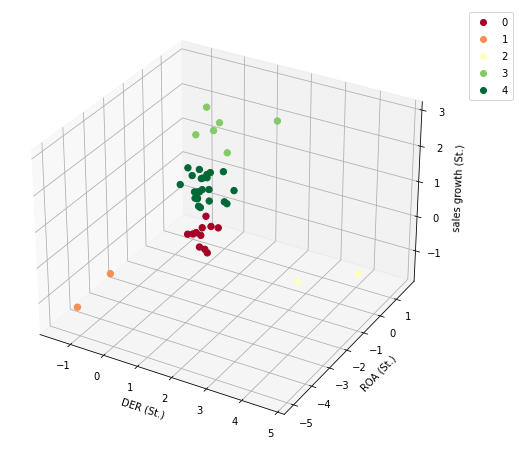

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_dataframe['DER (St.)']
y = new_dataframe['ROA (St.)']
z = new_dataframe['sales growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_dataframe['category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# 3.7.2 X vs Z View

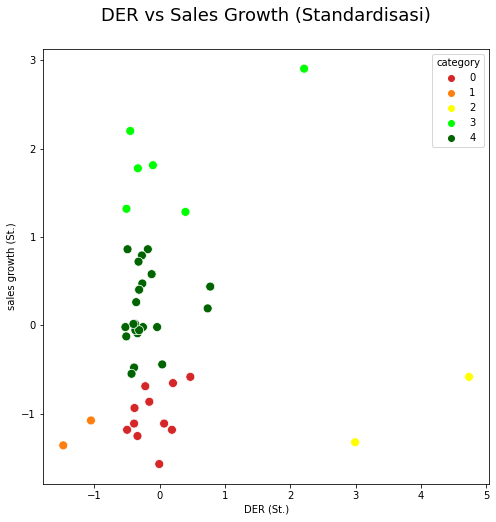

In [27]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.3 Y vs Z View

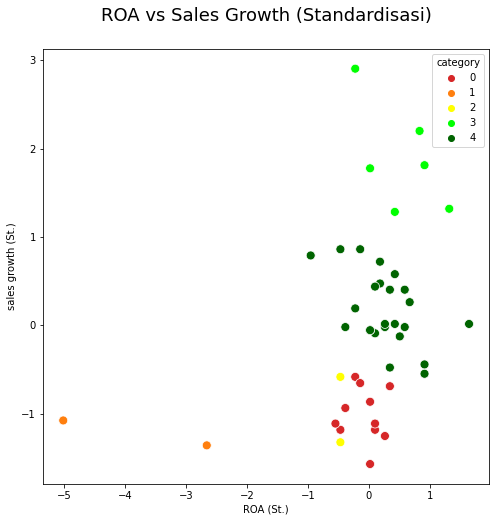

In [28]:
sns.scatterplot(x='ROA (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("ROA vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.4 X vs Y View

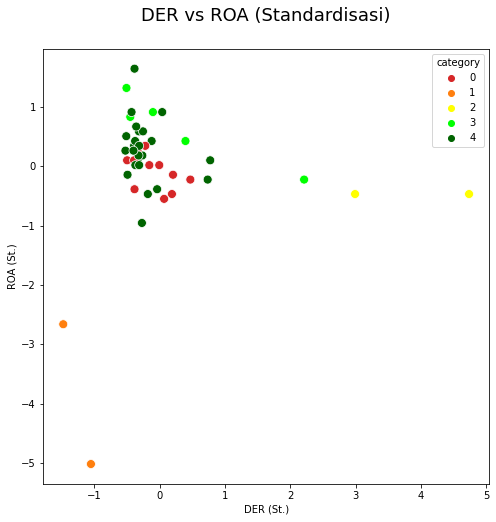

In [29]:
sns.scatterplot(x='DER (St.)', y='ROA (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 4. Export Result

In [30]:
data.head(5)

,emiten,sales growth,DER,ROA,category
0,AMFG,0.33,1.32,0.06,NaT
1,AMIN,0.41,1.14,-0.05,NaT
2,APII,0.03,0.49,0.05,NaT
3,ARKA,0.22,3.97,-0.02,NaT
4,ARNA,0.17,0.51,0.21,NaT


Adjust Initial Data (data):
Delete outlier YELO and other column other than emiten, DER, ROA,sales growth.

In [31]:
# drop these row indexes
# from dataFrame
index_names = data[ data['emiten'] == 'AMFG' ].index
data.drop(index_names, inplace = True)
data.reset_index(drop=True, inplace=True)
data.drop(["category"], axis=1, inplace=True)

Concat **Industry Emiten List** dftemp, Result new_dataframe and Initial Data data

In [32]:
data

,emiten,sales growth,DER,ROA
0,AMIN,0.41,1.14,-0.05
1,APII,0.03,0.49,0.05
2,ARKA,0.22,3.97,-0.02
3,ARNA,0.17,0.51,0.21
4,CAKK,0.30,0.88,0.03
5,CCSI,0.79,0.31,0.11
6,CTTH,-0.17,2.28,-0.05
7,HEXA,0.68,1.38,0.12
8,IKBI,0.67,0.67,0.01
9,IMPC,0.28,0.72,0.08


In [33]:
dftemp = pd.read_csv('../input/daftar-emiten-sektor-industri-mar-2022/Daftar_Emiten_Sektor_Industri_Mar_2022.csv')
df = pd.concat([dftemp, new_dataframe, data], axis=1)
df.head(5)

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),emiten,sales growth,DER,ROA
0,AMFG,Asahimas Flat Glass Tbk,4.0,0.579766,-0.120598,0.423833,AMIN,0.41,1.14,-0.05
1,AMIN,PT Ateliers Mecaniques D Indonesie Tbk.,4.0,0.861814,-0.178813,-0.468922,APII,0.03,0.49,0.05
2,APII,PT Arita Prima Indonesia Tbk.,4.0,-0.477915,-0.389033,0.342673,ARKA,0.22,3.97,-0.02
3,ARKA,PT Arkha Jayanti Persada Tbk.,4.0,0.191949,0.736453,-0.225443,ARNA,0.17,0.51,0.21
4,ARNA,Arwana Citramulia Tbk,4.0,0.015669,-0.382565,1.641226,CAKK,0.30,0.88,0.03


In [34]:
df.to_csv('result.csv', index = False)

# 5. Get Centroid

In [35]:
kmeans.cluster_centers_

array([[-0.95387127,  3.86226622, -0.46892159],
       [ 0.17432144, -0.2242259 ,  0.26151396],
       [-1.21829143, -1.26063846, -3.83704106],
       [-1.01316548, -0.09501888, -0.08525847],
       [ 1.88423852,  0.20389563,  0.54557223]])

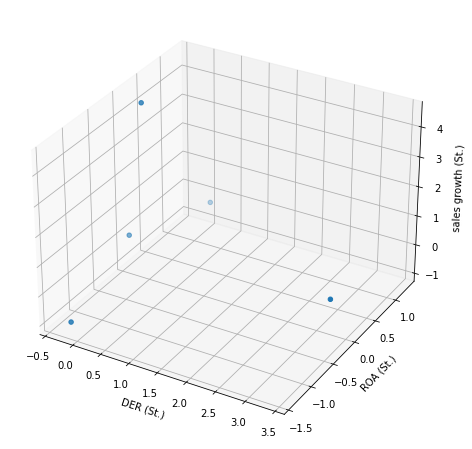

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")
ax.scatter(x, y, z)
plt.show()

# 6. Cluster Description

In [37]:
#Highly Positively Impacted
df[df['category'] == 4].describe() 

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER
count,24.0,24.000000,24.000000,24.000000,23.000000,23.000000
mean,4.0,0.174321,-0.224226,0.261514,0.124783,1.624348
std,0.0,0.408780,0.330665,0.522148,0.309881,2.902019
min,4.0,-0.548427,-0.521634,-0.955879,-0.280000,-2.860000
25%,4.0,-0.054843,-0.384182,0.018035,-0.125000,0.475000
50%,4.0,0.015669,-0.317882,0.261514,0.150000,0.650000
75%,4.0,0.447556,-0.234602,0.525282,0.230000,1.410000
max,4.0,0.861814,0.775263,1.641226,0.990000,10.940000


In [38]:
#Positively Impacted
df[df['category'] == 3].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.0,1.884239,0.203896,0.545572,0.241667,1.401667
std,0.0,0.606568,1.036610,0.582429,0.295392,1.055716
min,3.0,1.284886,-0.505463,-0.225443,-0.170000,0.670000
25%,3.0,1.434724,-0.418141,0.119485,0.070000,0.722500
50%,3.0,1.796098,-0.216006,0.626732,0.280000,0.795000
75%,3.0,2.104589,0.272352,0.890500,0.362500,1.925000
max,3.0,2.906663,2.211229,1.316588,0.670000,3.150000


In [39]:
#Neutral Impacted
df[df['category'] == 2].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
mean,2.0,-0.953871,3.862266,-0.468922,0.070000,1.620000
std,0.0,0.523525,1.232636,0.000000,0.127279,1.004092
min,2.0,-1.324059,2.990661,-0.468922,-0.020000,0.910000
25%,2.0,-1.138965,3.426464,-0.468922,0.025000,1.265000
50%,2.0,-0.953871,3.862266,-0.468922,0.070000,1.620000
75%,2.0,-0.768777,4.298069,-0.468922,0.115000,1.975000
max,2.0,-0.583683,4.733872,-0.468922,0.160000,2.330000


In [40]:
#Negatively Impacted
df[df['category'] == 1].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,-1.218291,-1.260638,-3.837041,0.100000,1.700000
std,0.0,0.199438,0.299583,1.664265,0.084853,0.169706
min,1.0,-1.359316,-1.472476,-5.013854,0.040000,1.580000
25%,1.0,-1.288803,-1.366557,-4.425447,0.070000,1.640000
50%,1.0,-1.218291,-1.260638,-3.837041,0.100000,1.700000
75%,1.0,-1.147779,-1.154720,-3.248635,0.130000,1.760000
max,1.0,-1.077267,-1.048801,-2.660228,0.160000,1.820000


In [41]:
#Highly Negatively Impacted
df[df['category'] == 0].describe()


,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.0,-1.013165,-0.095019,-0.085258,0.223636,2.040909
std,0.0,0.298666,0.305813,0.295070,0.297331,4.860384
min,0.0,-1.570852,-0.495760,-0.550081,-0.150000,-1.550000
25%,0.0,-1.183035,-0.359926,-0.306603,-0.040000,0.155000
50%,0.0,-1.112523,-0.156174,0.018035,0.170000,0.540000
75%,0.0,-0.777591,0.130049,0.099195,0.470000,1.295000
max,0.0,-0.583683,0.471253,0.342673,0.680000,16.330000
